# Zadanie 5

Celem ćwiczenia jest implementacja algorytmu Q-learning.

Następnie należy stworzyć agenta rozwiązującego problem [Taxi](https://gymnasium.farama.org/environments/toy_text/taxi/). Problem dostępny jest w pakiecie **gym**.

Punktacja (max 7 pkt):
- Implementacja algorytmu Q-learning. [3 pkt]
- Eksperymenty dla różnych wartości hiperparametrów [2 pkt]
- Jakość kodu [1 pkt]
- Wnioski [1 pkt]


In [1]:
import numpy as np
import random
import gymnasium as gym
import time
import matplotlib.pyplot as plt

In [6]:
class QLearningSolver:
    """Class containing the Q-learning algorithm that might be used for different discrete environments."""

    def __init__(
        self,
        observation_space: int,
        action_space: int,
        env: gym.Env,
        episodes: int = 1000,
        timestep: int = 100,
        learning_rate: float = 0.1,
        gamma: float = 0.9,
        epsilon: float = 0.1,

    ):
        self.observation_space = observation_space
        self.action_space = action_space
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = {}
        self.env = env
        self.episodes = episodes
        self.timestep = timestep

    def _initialize_Q(self):
        for state in range(self.observation_space):
            self.q_table[state] = {}
            for action in range(self.action_space):
                self.q_table[state][action] = 0

    def __call__(self, state: np.ndarray, action: np.ndarray) -> np.ndarray:
        """Return Q-value of given state and action."""
        return self.q_table[state][action]

    def _update(self, state: np.ndarray, new_state: np.ndarray, action: np.ndarray, reward: float) -> None:
        """Update Q-value of given state and action."""
        max_arg = self.q_table[new_state][self.get_best_action(new_state)]
        delta = reward + self.gamma * max_arg - self.q_table[state][action]
        self.q_table[state][action] += self.learning_rate * delta


    def get_best_action(self, state: np.ndarray) -> np.ndarray:
        """Return action that maximizes Q-value for a given state."""

        return max(range(6), key=lambda action: self.q_table[state][action])

    def __repr__(self):
        """Elegant representation of Q-learning solver."""
        res = 'state\tdown\tup\tright\tleft\tpickup\tdropoff\n\t0\t1\t2\t3\t4\t5\t\n'
        for key in self.q_table:
            row = f'{key}\t'
            for value in self.q_table[key].values():
                row+= f'{value:.2f}\t'
            row += '\n'
            res+= row
        return res

    def __str__(self):
        return self.__repr__()

    def test_algorithm(self, iterations = 500):
        """Returns success rate in % of Q-algorithm"""
        res = 0
        for _ in range(iterations):
            observation, _ = self.env.reset()
            for _ in range(30):
                observation, _, terminated, truncated, _ = self.env.step(self.get_best_action(observation))
                if terminated or truncated:
                    res+=1
                    break
        return round(res/iterations*100, 1)

    def q_learning(self):
        """Makes q_table, and additionally gives success rate every 100 episodes"""
        results = []
        previous_success_rate = 0
        self._initialize_Q()
        for episod in range(self.episodes):
            state, _ = self.env.reset()
            for _ in range(self.timestep):
                if self.epsilon > random.random():
                    action = random.randint(0, self.action_space-1)
                else:
                    action = self.get_best_action(state)

                new_state, reward, _, _, _ = self.env.step(action)
                # punishment for action like moving into wall
                if new_state == state:
                    reward = -10

                self._update(state, new_state, action, reward)
                state = new_state

            # checking success rate every 100 episodes
            if episod % 100 == 0:

                success_rate = self.test_algorithm()
                results.append(success_rate)
                if success_rate > 98:
                    break
                # or
                # if success_rate == previous_success_rate == 100:
                #     break
                previous_success_rate = success_rate
        return results

In [8]:
class TaxiSolver(QLearningSolver):
    def __init__(self) -> None:
        super().__init__(500, 6, gym.make('Taxi-v3'), 10000, 250, 1)

env = gym.make('Taxi-v3', render_mode='ansi')
taxi_solver = TaxiSolver()
results = taxi_solver.q_learning()
# print(results)
print(taxi_solver)

state	down	up	right	left	pickup	dropoff
	0	1	2	3	4	5	
0	70.57	70.53	70.57	70.53	89.47	70.53	
1	24.68	19.54	24.68	19.54	32.82	19.54	
2	42.86	39.74	42.86	39.74	55.26	-10.00	
3	-6.13	-10.00	28.54	23.82	37.58	-10.00	
4	8.43	-10.00	-7.94	-10.00	-10.00	-16.46	
5	0.00	0.00	0.00	0.00	0.00	0.00	
6	-7.46	-10.00	-7.18	-10.00	-15.86	-13.10	
7	-6.51	-10.00	-6.86	-10.00	-10.00	-10.00	
8	32.82	-10.00	-4.69	-10.00	-14.22	-10.00	
9	18.09	6.28	-6.86	6.28	-10.00	-10.00	
10	0.00	0.00	0.00	0.00	0.00	0.00	
11	21.22	-10.00	-7.18	-10.00	-10.00	-10.00	
12	12.76	-10.00	-7.18	-10.00	-10.00	-16.18	
13	18.09	-10.00	-6.13	-10.00	-15.51	-10.00	
14	-6.13	-10.00	-6.13	-10.00	-10.00	-10.00	
15	0.00	0.00	0.00	0.00	0.00	0.00	
16	79.53	80.47	79.53	80.47	80.47	100.53	
17	37.58	-10.00	28.54	23.82	23.82	-4.10	
18	62.52	46.26	-2.71	-10.00	-10.00	48.74	
19	42.86	-10.00	42.86	-10.00	28.58	32.82	
20	62.52	61.57	61.57	79.53	61.57	61.57	
21	-6.13	-10.00	-11.71	28.54	-10.00	-14.70	
22	-4.69	-10.00	33.86	48.74	-10.00	-10.00	
23	-6.1

In [19]:
env = gym.make('Taxi-v3')

class TaxiSolver(QLearningSolver):
    def __init__(self, episodes, timestep, learning_rate=0.1, gamma=0.9, epsilon=0.1) -> None:
        super().__init__(500, 6, env, episodes, timestep, learning_rate, gamma, epsilon)

class TaxiPlots:
    def plot_times_by_timestep(self):
        results = []
        for timestep in range(10, 300, 20):
            start = time.time()
            taxi = TaxiSolver(10000, timestep)
            taxi.q_learning()
            end = time.time()
            results.append(end-start)

        plt.bar(list(range(10, 300, 20)), results, color='blue', width=10)

        plt.xlabel('timestep')
        plt.ylabel('time[s]')
        plt.title('time of computing q table ')

        plt.show()

    def plot_by_learning_rate(self):
        res = []
        for learning_rate in range(1, 11):
            taxi = TaxiSolver(2100, 50, learning_rate/10)
            res.append( taxi.q_learning())

        self.heatmap(res, 'learning rate')

    def plot_by_gamma(self):
        res = []
        for gamma in range(1, 11):
            taxi = TaxiSolver(2100, 50, 0.4, gamma = gamma/10)
            res.append( taxi.q_learning())

        self.heatmap(res, 'gamma')

    def plot_by_epsilon(self):
        res = []
        for epsilon in range(1, 11):
            taxi = TaxiSolver(2100, 50, 0.4, 0.7, epsilon = epsilon/10)
            res.append( taxi.q_learning())

        self.heatmap(res, 'epsilon')

    def check_best_gamma_lr(self):
        res = []
        for gamma in range(1, 11):
            for learning_rate in range(1, 11):
                taxi = TaxiSolver(10000, 50, learning_rate/10, gamma/10)
                start = time.time()
                taxi.q_learning()
                end = time.time()
                res.append([end-start, learning_rate/10, gamma/10])
        return min(res)

    def heatmap(self, res, ylabel):
        max_length = max(len(lst) for lst in res)
        matrix = np.full((len(res), max_length), 100)

        for i, lst in enumerate(res):
            matrix[i, :len(lst)] = lst


        fig, ax = plt.subplots()

        ax.set_xticks(np.arange(0, max_length, 5), labels=[i*100 for i in range(1, max_length+1, 5)])
        ax.set_yticks(np.arange(10), labels=[i/10 for i in range(1,11)])
        im = ax.imshow(matrix, cmap='viridis', aspect='auto', interpolation='none')

        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.ax.set_ylabel('Success rate', rotation=-90, va="bottom")
        plt.xlabel('Iterations')
        plt.ylabel(ylabel)
        plt.title('Success rate every 100 episodes')

        plt.show()

plots = TaxiPlots()

# Eksperymenty

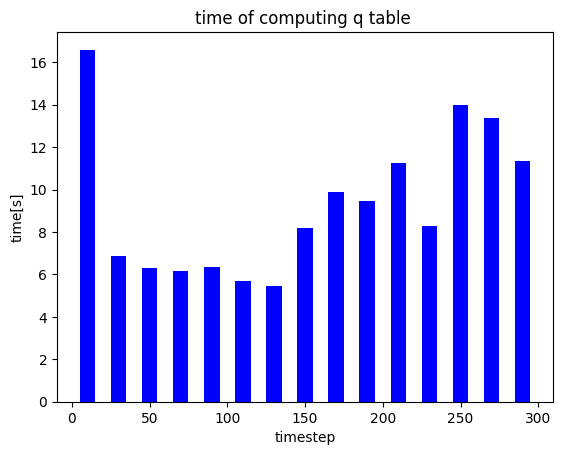

In [20]:
plots.plot_times_by_timestep()

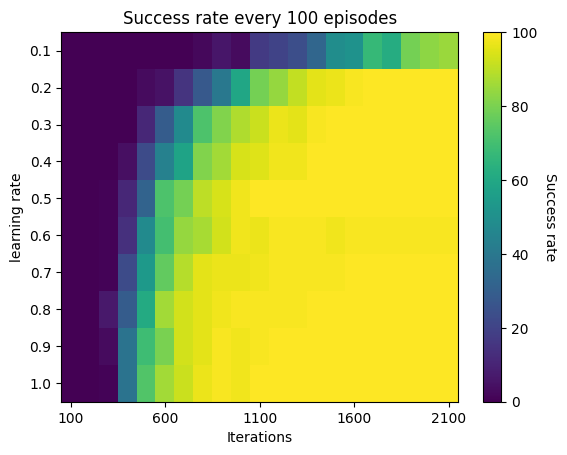

In [17]:
plots.plot_by_learning_rate()

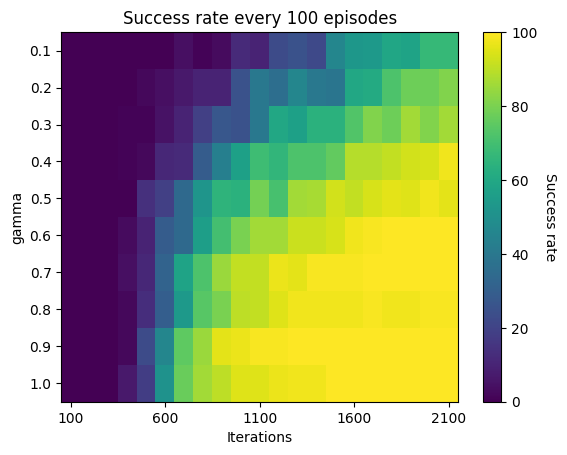

In [15]:
plots.plot_by_gamma()

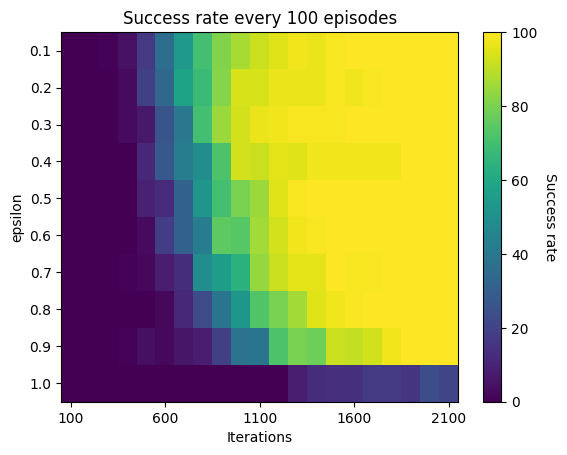

In [16]:
plots.plot_by_epsilon()

In [74]:
res = plots.check_best_gamma_lr()
print(f'Best learning rate = {res[1]}, best gamma = {res[2]}')

Best learning rate = 1.0, best gamma = 0.7


In [10]:
env = gym.make('Taxi-v3', render_mode='human')
observation, info = env.reset()

for _ in range(30):
    observation, reward, terminated, truncated, info = env.step(taxi_solver.get_best_action(observation))
    time.sleep(0.5)
    if terminated or truncated:
        break

env.close()

# Wnioski

learning rate - wyższy przyśpiesza uczenie, ale też zbyt duży może powodować niestabilność, w problemie taxi, zdecydowanie wyższy learning rate bliski 1 zwycięża z innymi

epsilon - w tej implementacji wyższy zwiększa eksploatację, a niższy eksplorację, tutaj najlepszym okazał się epsilon w okolicach 0.2

timestep - liczba ruchów wykonanych w epizodzie, wg testów optymalna jest w granicach 30-70

gamma - wyższa odpowiada za pożądanie za dalszą nagrodą, niższa odpowiednio za bliższą, w tym wypadku najlepsza była gamma = w okolichach 0.7-0.9